# Time Series

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Data Preparation and Exploration 

In [10]:
df = pd.read_csv("exchange_rate.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [12]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [13]:
 df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

df.set_index('date', inplace=True)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB
None
            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849


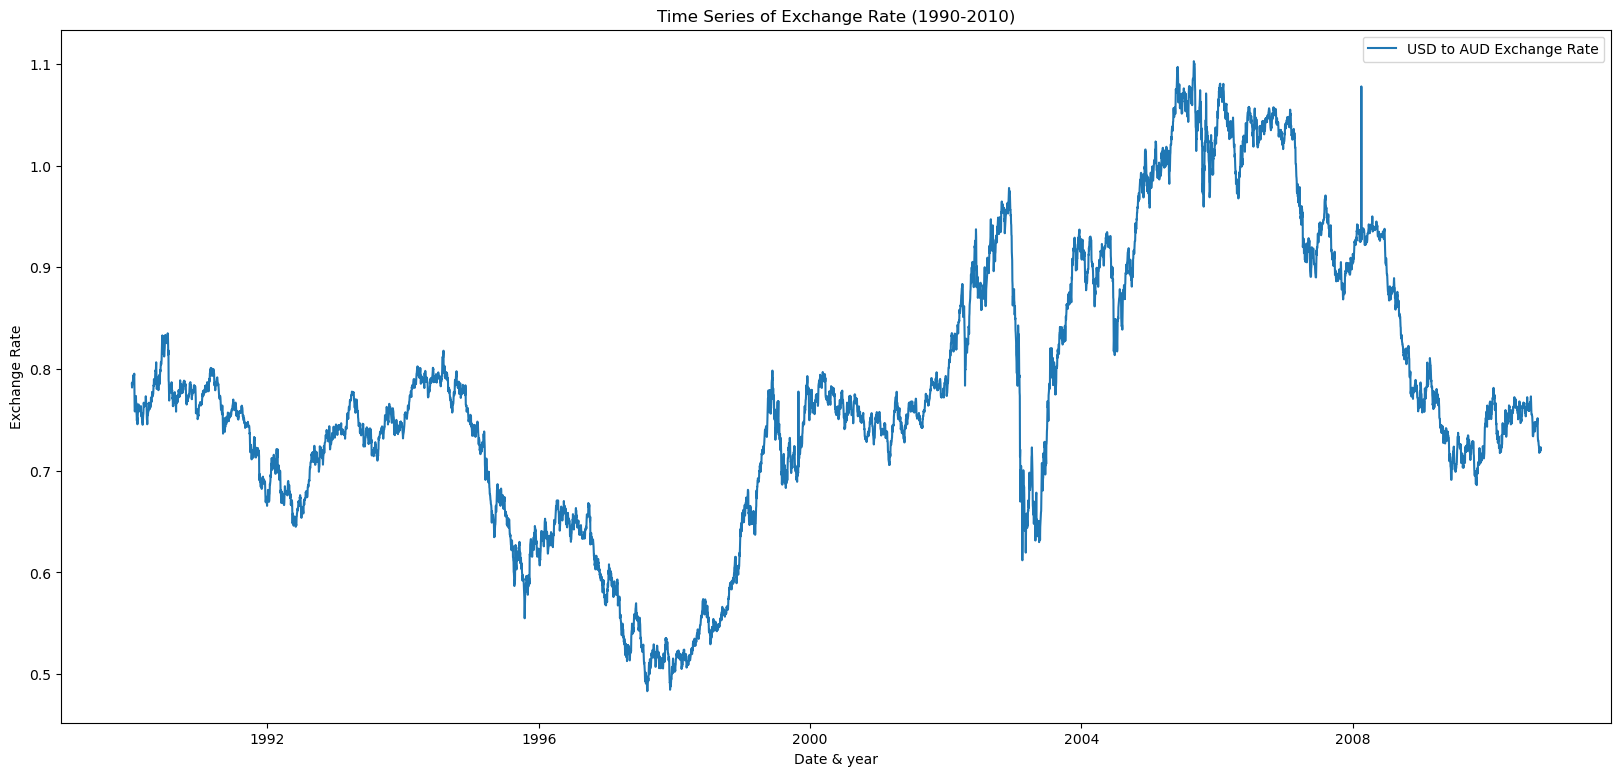

In [15]:
plt.figure(figsize=(20, 9))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('Time Series of Exchange Rate (1990-2010)')
plt.xlabel('Date & year')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

<Figure size 2000x900 with 0 Axes>

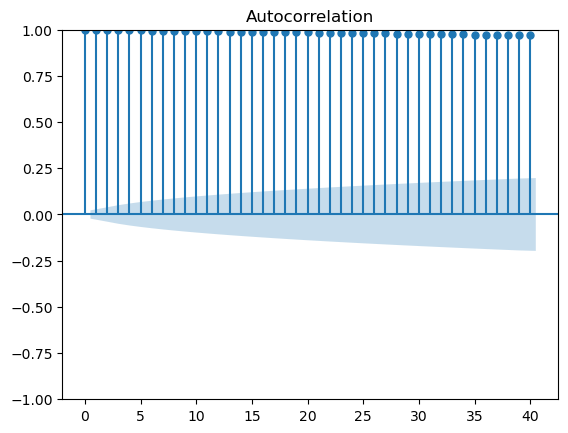

In [16]:
plt.figure(figsize=(20, 9))
plot_acf(df['Ex_rate'], lags=40)
plt.show()

<Figure size 2000x900 with 0 Axes>

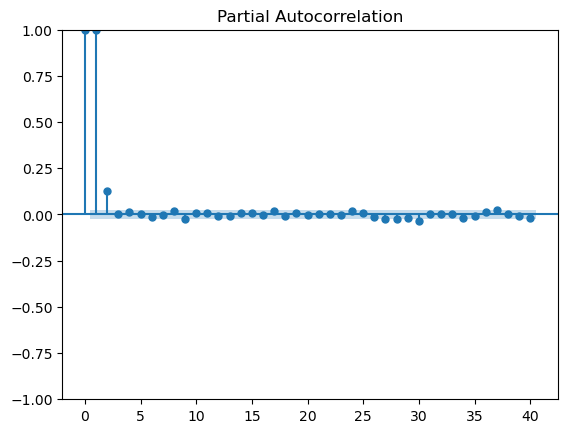

In [17]:
plt.figure(figsize=(20, 9))
plot_pacf(df['Ex_rate'], lags=40)
plt.show()

### Arima model

In [32]:
p,d,q = 1, 1, 1  
arima_model = ARIMA(df['Ex_rate'], order=(p,d,q))
arima_result = arima_model.fit()
print(arima_result.summary())


C:\Users\dvvre\Desktop\T_rex\alpha\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dvvre\Desktop\T_rex\alpha\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dvvre\Desktop\T_rex\alpha\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 28 Dec 2024   AIC                         -56102.322
Time:                        17:53:37   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

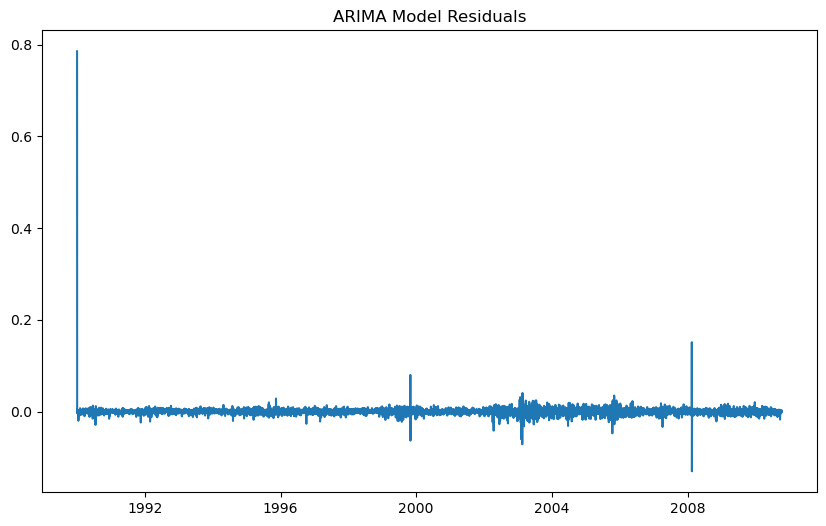

In [20]:
residuals = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.show()

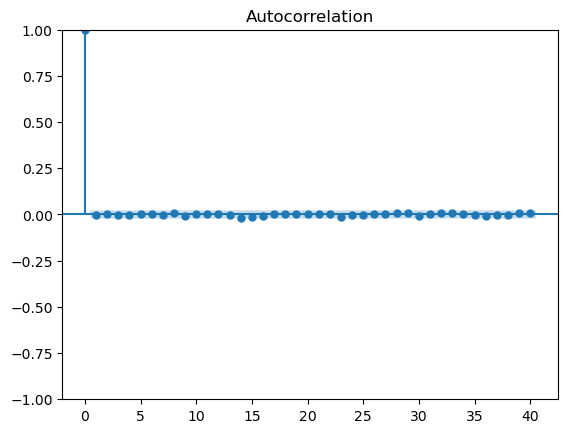

In [21]:
plot_acf(residuals, lags=40)
plt.show()

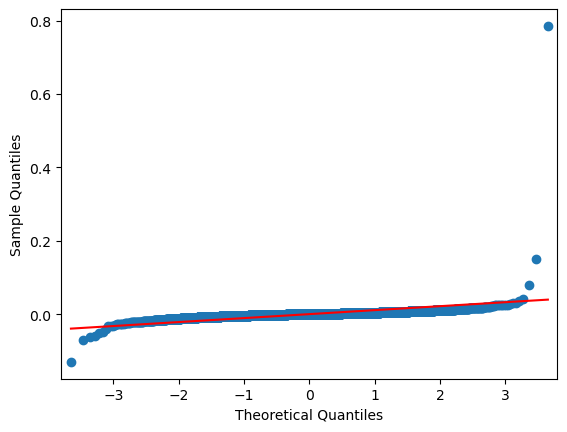

In [22]:
qqplot(residuals, line='s')
plt.show()

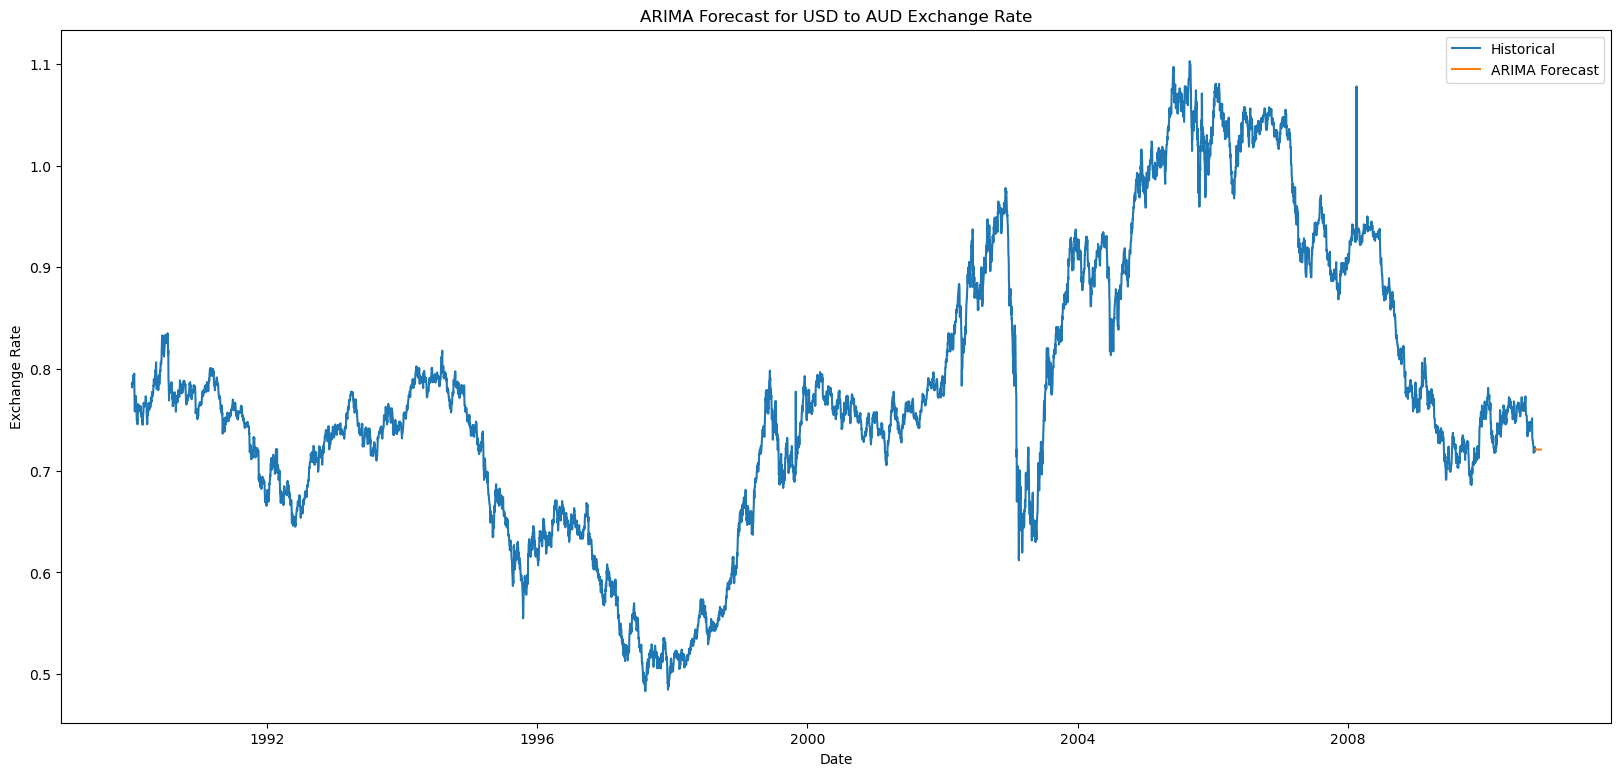

In [23]:
forecast_steps = 30 
forecast_arima = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(20, 9))
plt.plot(df.index, df['Ex_rate'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Forecast for USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


### ExponentialSmoothing

In [24]:
expo_smooth_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None, seasonal_periods=None)
expo_smooth_result = expo_smooth_model.fit()
print(expo_smooth_result.summary())

C:\Users\dvvre\Desktop\T_rex\alpha\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Sat, 28 Dec 2024
Box-Cox:                          False   Time:                         17:47:52
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700393                alpha                 True
smoothing_trend           1.3992e-

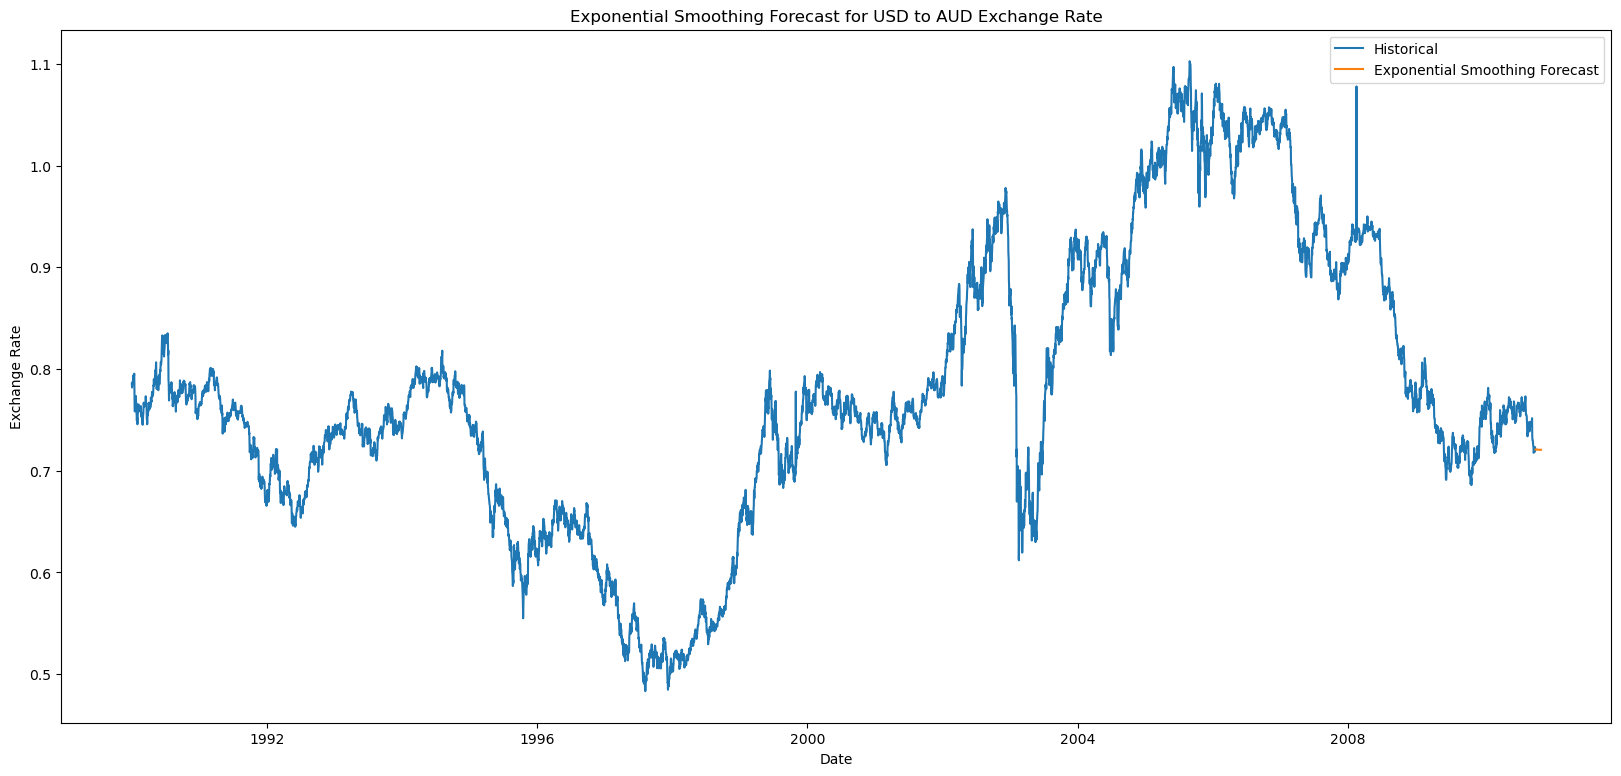

In [27]:
expo_smooth_forecast = expo_smooth_result.forecast(steps=forecast_steps)
plt.figure(figsize=(20, 9))
plt.plot(df.index, df['Ex_rate'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], expo_smooth_forecast, label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast for USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


### Evaluation and comparison metrics

In [28]:
actual = df['Ex_rate'][-forecast_steps:]

mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima))
mape_arima = np.mean(np.abs((actual - forecast_arima) / actual)) * 100

In [30]:
mae_es = mean_absolute_error(actual, expo_smooth_forecast)
rmse_es = np.sqrt(mean_squared_error(actual, expo_smooth_forecast))
mape_es = np.mean(np.abs((actual - expo_smooth_forecast) / actual)) * 100

In [31]:
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%')
print(f'Exponential Smoothing - MAE: {mae_es}, RMSE: {rmse_es}, MAPE: {mape_es}%')

ARIMA - MAE: 0.01272400648930223, RMSE: 0.01698271091275075, MAPE: nan%
Exponential Smoothing - MAE: 0.012755723263635966, RMSE: 0.017005200227771498, MAPE: nan%
